In This homework You will take a data set and build a model from the data to predict the target and evaluate the preformance using cross validation and grid search. If you are building a classification model you should adress which measure of accuracy is important and incorperate that in your analysis. There are four datasets that have been provided. Information for each of them can be found here:

Climate failure (pop_failures_fixed.dat):

https://archive.ics.uci.edu/dataset/252/climate+model+simulation+crashes

Forest Fires (forestfires.csv)

https://archive.ics.uci.edu/dataset/162/forest+fires

Wine Quality (winequality-white.csv,whinequality-red.csv)

https://archive.ics.uci.edu/dataset/186/wine+quality

If you wnat to choose your own dataset you can use the following link:

https://archive.ics.uci.edu/datasets

You should first state the question you are trying to answer whith the model and then read in the data and make sure that the data is cleaned and ready for modeling. 

Next you may want to do some exploratory data analysis and convert and or scale any features you may want to use. You do not need to use all the fetures in the dataset, but you should have an explaination for any features that you drop.

Next build an appropriate model to answer your question. Determine how well your model can answer your question  using cross-validation and grid search.

Finally communicate your findings in a few paragraphs.

### Question: What features are significant for predicting red wine quality? What features, if any, are noise, or distractors? ###

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

df_wine_red = pd.read_csv("winequality-red.csv", sep=';')
# df_wine_white=pd.read_csv("winequality-white.csv", sep=';')
# df_fires=pd.read_csv('forestfires.csv')
# df_pop=pd.read_csv('pop_failures_fixed.dat',sep=',')

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

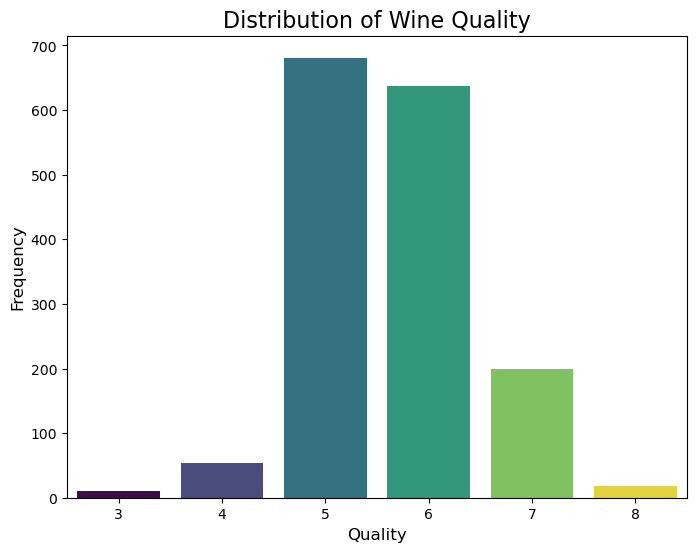

Accuracy: 0.6792
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.73      0.79      0.76       204
           6       0.64      0.68      0.66       192
           7       0.61      0.57      0.59        60
           8       1.00      0.20      0.33         5

    accuracy                           0.68       480
   macro avg       0.50      0.37      0.39       480
weighted avg       0.65      0.68      0.66       480



c:\Users\domin\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\domin\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\domin\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

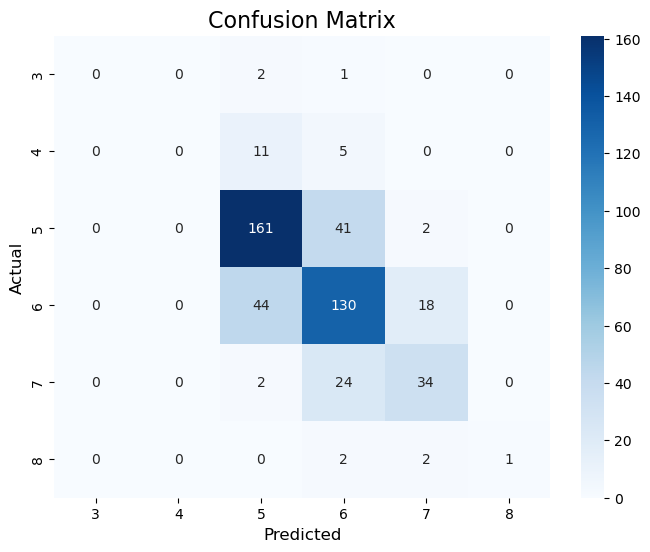

Cross-Validation Accuracy Scores: [0.66517857 0.67857143 0.64285714 0.70982143 0.66816143]
Mean CV Accuracy: 0.6729


In [3]:
# Display some data, statistics, and summary info
df_wine_red.describe()
print(df_wine_red.head())
print(df_wine_red.info())

# Calculate and Display the frequency of each quality rating
quality_counts = df_wine_red['quality'].value_counts().sort_index()
print(quality_counts)

# Visualize the target variable (quality) distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=df_wine_red['quality'], hue=df_wine_red['quality'], legend=False, palette='viridis')
plt.title('Distribution of Wine Quality', fontsize=16)
plt.xlabel('Quality', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Data Preprocessing
# Features and target split
target = df_wine_red['quality']  # Extract target
features = df_wine_red.drop('quality', axis=1)  # Extract features

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=7, stratify=target)

# Feature scaling (Standard: Mean = 0, Std = 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build model and tune hyperparameter using Grid Search
rf = RandomForestClassifier(random_state=7)

# Define hyperparameters to tune
grid_tune = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid Search with Cross-Validation (cv=5)
grid_search = GridSearchCV(estimator=rf, param_grid=grid_tune, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the model
# Predict on the test set
y_pred = best_model.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

# Step 5: Cross-Validation Scores
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
